<a href="https://colab.research.google.com/github/mili-b/PredictiveAnalytics/blob/main/Deaths2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### predict whether a state will will be high (above US median death rate) or low risk (below US median death rate) based on number of deaths and disease types

## LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy.stats.mstats import winsorize



## import and examine data

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/mili-b/Data/main/death.csv')

In [3]:
df.shape

(10296, 6)

In [4]:
df.head()

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
0,2012,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Vermont,21,2.6
1,2016,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Vermont,30,3.7
2,2013,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Vermont,30,3.8
3,2000,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,District of Columbia,23,3.8
4,2014,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Arizona,325,4.1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10296 entries, 0 to 10295
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     10296 non-null  int64  
 1   113 Cause Name           10296 non-null  object 
 2   Cause Name               10296 non-null  object 
 3   State                    10296 non-null  object 
 4   Deaths                   10296 non-null  int64  
 5   Age-adjusted Death Rate  10296 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 482.8+ KB


In [6]:
# 11 causes
df['113 Cause Name'].nunique()

11

In [7]:
df['113 Cause Name'].unique()

array(['Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)',
       'Intentional self-harm (suicide) (*U03,X60-X84,Y87.0)',
       "Alzheimer's disease (G30)", 'Influenza and pneumonia (J09-J18)',
       'Diabetes mellitus (E10-E14)',
       'Chronic lower respiratory diseases (J40-J47)',
       'Accidents (unintentional injuries) (V01-X59,Y85-Y86)',
       'Cerebrovascular diseases (I60-I69)',
       'Diseases of heart (I00-I09,I11,I13,I20-I51)',
       'Malignant neoplasms (C00-C97)', 'All Causes'], dtype=object)

In [8]:
# 'cause name' appears to be a shortened version of '113 Cause Name'

df['Cause Name'].unique()

array(['Kidney disease', 'Suicide', "Alzheimer's disease",
       'Influenza and pneumonia', 'Diabetes', 'CLRD',
       'Unintentional injuries', 'Stroke', 'Heart disease', 'Cancer',
       'All causes'], dtype=object)

In [9]:
df['Cause Name'].nunique()

11

In [10]:
# covers the period 1999-2016 = 18 years
df['Year'].unique()

array([2012, 2016, 2013, 2000, 2014, 2009, 2011, 2015, 2001, 1999, 2006,
       2002, 2003, 2008, 2005, 2004, 2007, 2010])

In [11]:
df['Year'].nunique()

18

In [12]:
# data for 51 states (including District of Columbia) and US overall

df['State'].nunique()

52

In [13]:
df['State'].unique()

array(['Vermont', 'District of Columbia', 'Arizona', 'South Dakota',
       'Washington', 'Iowa', 'New York', 'Massachusetts', 'New Jersey',
       'California', 'North Dakota', 'Rhode Island', 'Alaska', 'Oregon',
       'Wyoming', 'Idaho', 'Connecticut', 'Minnesota', 'Illinois',
       'Montana', 'New Hampshire', 'Hawaii', 'Maryland', 'Florida',
       'Colorado', 'Nevada', 'Utah', 'Delaware', 'New Mexico', 'Nebraska',
       'Ohio', 'Michigan', 'Maine', 'Tennessee', 'Pennsylvania', 'Texas',
       'Georgia', 'Louisiana', 'Indiana', 'United States', 'Mississippi',
       'South Carolina', 'Virginia', 'Kansas', 'Wisconsin',
       'North Carolina', 'Alabama', 'Kentucky', 'Missouri', 'Oklahoma',
       'West Virginia', 'Arkansas'], dtype=object)

# DATA MANIPULATION/TRANSFORMATION

#### **Outliers**

In [14]:
df.describe()

,Year,Deaths,Age-adjusted Death Rate
count,10296.000000,1.029600e+04,10296.000000
mean,2007.500000,1.536793e+04,128.037383
std,5.188379,1.121457e+05,224.381865
min,1999.000000,2.100000e+01,2.600000
25%,2003.000000,6.060000e+02,19.200000
50%,2007.500000,1.704500e+03,35.800000
75%,2012.000000,5.678000e+03,153.025000
max,2016.000000,2.744248e+06,1087.300000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f46c268fa50>,
      dtype=object)

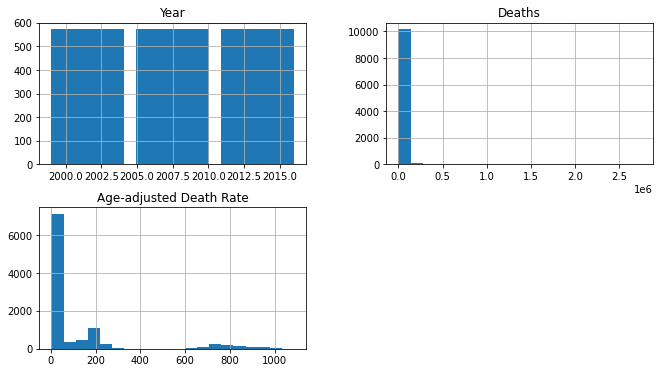

In [15]:
df.hist(bins=20, figsize=(11,6))

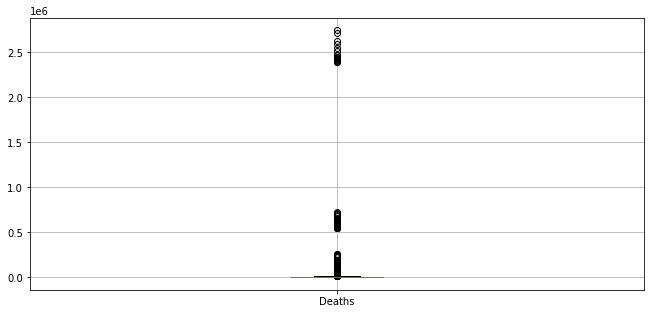

In [16]:
plt.figure(figsize=(11,5))
boxplot = df.boxplot(column=['Deaths'])

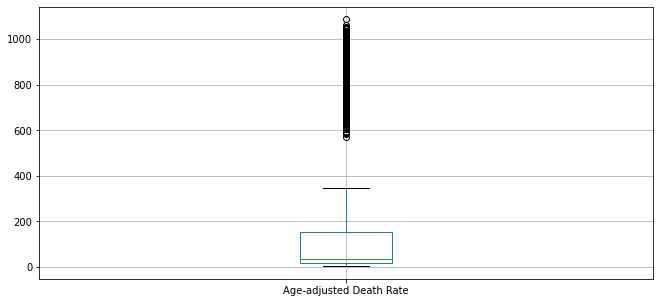

In [17]:
plt.figure(figsize=(11,5))
boxplot = df.boxplot(column=['Age-adjusted Death Rate'])

based on histograms and boxplots, 'Deaths' and 'Age-adjusted Death Rate' are right skewed with outliers.

we can use Winsorize to address outliers

In [18]:
from scipy.stats.mstats import winsorize

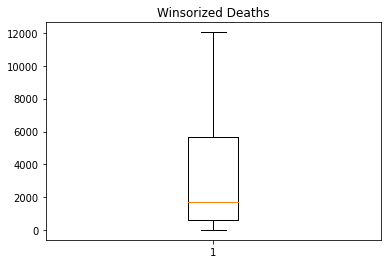

In [19]:
# CREATE NEW COLUMNS 'W_Deaths', and 'W_Age Adjusted Death Rate' to address outliers


df['W_Deaths'] = winsorize(df['Deaths'],(0, 0.15))
  
plt.boxplot(df['W_Deaths'])
plt.title("Winsorized Deaths")
plt.show()

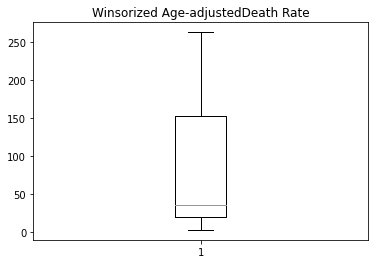

In [20]:
df['W_Age Adjusted Death Rate'] = winsorize(df['Age-adjusted Death Rate'],(0, 0.10))
plt.boxplot(df['W_Age Adjusted Death Rate'])
plt.title("Winsorized Age-adjustedDeath Rate")
plt.show()

In [21]:
df.columns

Index(['Year', '113 Cause Name', 'Cause Name', 'State', 'Deaths',
       'Age-adjusted Death Rate', 'W_Deaths', 'W_Age Adjusted Death Rate'],
      dtype='object')

In [22]:
df.head(3)

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate,W_Deaths,W_Age Adjusted Death Rate
0,2012,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Vermont,21,2.6,21,2.6
1,2016,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Vermont,30,3.7,30,3.7
2,2013,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Vermont,30,3.8,30,3.8


In [23]:
# MEANS AND MEDIANS - MEANS OF WINSORIZE DATA CHANGE, MEDIAN SAME

df[['Deaths','Age-adjusted Death Rate','W_Deaths','W_Age Adjusted Death Rate']].mean()

Deaths                       15367.932789
Age-adjusted Death Rate        128.037383
W_Deaths                      3749.196387
W_Age Adjusted Death Rate       78.946455
dtype: float64

In [24]:
df[['Deaths','Age-adjusted Death Rate','W_Deaths','W_Age Adjusted Death Rate']].median()

Deaths                       1704.5
Age-adjusted Death Rate        35.8
W_Deaths                     1704.5
W_Age Adjusted Death Rate      35.8
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f46c1d2f450>,
      dtype=object)

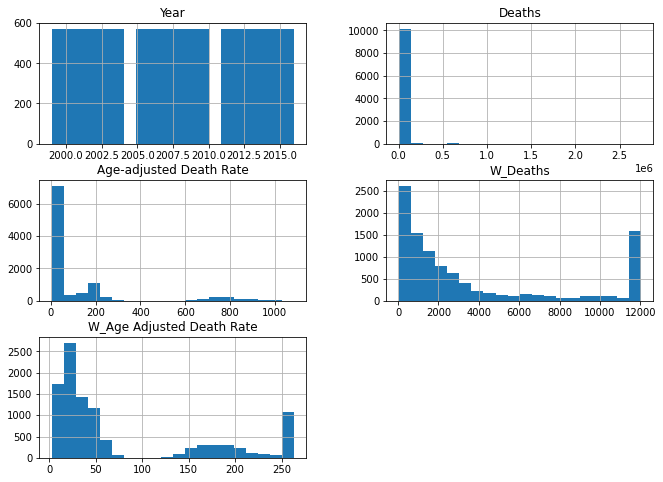

In [25]:
# histograms of winsorized varaibles show less concentration

df.hist(bins=20, figsize=(11,8))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


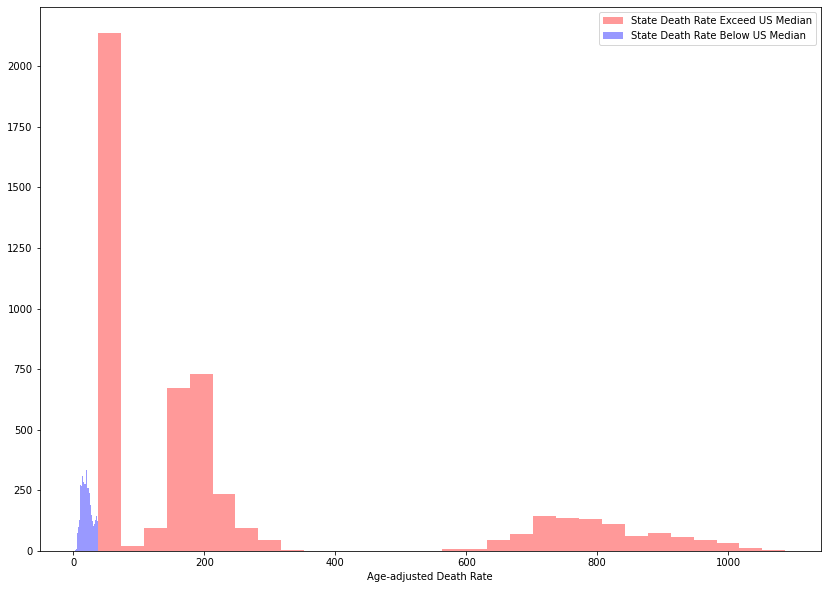

In [92]:

plt.subplots(figsize=(14,10))
sns.distplot(df[df['State_dum'] == 0]['Age-adjusted Death Rate'], bins=30, kde=False, color='red', label='State Death Rate Exceed US Median')
sns.distplot(df[df['State_dum'] == 1]['Age-adjusted Death Rate'], bins=30, kde=False, color='blue', label='State Death Rate Below US Median')
plt.legend(loc = 1)


#### **drop column '113 cause name'** - since same infor captured in column 'cause name'

In [26]:
df.drop(['113 Cause Name'], axis=1, inplace=True)


#### **create new column called Region**

In [27]:
# CREATE A NEW COLUMN CALLED REGION - BASED ON STATES 

df['Region'] = df['State']
df.head(2)

,Year,Cause Name,State,Deaths,Age-adjusted Death Rate,W_Deaths,W_Age Adjusted Death Rate,Region
0,2012,Kidney disease,Vermont,21,2.6,21,2.6,Vermont
1,2016,Kidney disease,Vermont,30,3.7,30,3.7,Vermont


In [28]:
# REDEFINE REGION COLUMN - BASED ON CENSUS BUREAU DEFINTION OF 4 REGIONS

# Census Bureau - 4 regions of US - W, MW, NE, S - create these plus US
# https://www.businessinsider.com/regions-of-united-states-2018-5#-and-the-west-4
#Northeast=Maine, New Hampshire, Vermont, Massachusetts, Rhode Island, Connecticut, New York, New Jersey, and Pennsylvania.
#Midwest=Ohio, Michigan, Indiana, Wisconsin, Illinois, Minnesota, Iowa, Missouri, North Dakota, South Dakota, Nebraska, and Kansas.
#South=Delaware, Maryland, Virginia, West Virginia, Kentucky, North Carolina, South Carolina, Tennessee, Georgia, Florida, Alabama, Mississippi, Arkansas, Louisiana, Texas, and Oklahoma and District of Columbia
#West=Montana, Idaho, Wyoming, Colorado, New Mexico, Arizona, Utah, Nevada, California, Oregon, Washington, Alaska, and Hawaii

df['Region'] = df['Region'].replace({'Maine':'NE','New Hampshire':'NE','Vermont':'NE','Massachusetts':'NE','Rhode Island':'NE','Connecticut':'NE','New York':'NE','New Jersey':'NE','Pennsylvania':'NE',
'Ohio':'MW','Michigan':'MW','Indiana':'MW','Wisconsin':'MW','Illinois':'MW','Minnesota':'MW','Iowa':'MW','Missouri':'MW','North Dakota':'MW','South Dakota':'MW','Nebraska':'MW','Kansas':'MW',
'Delaware':'S','Maryland':'S','Virginia':'S','West Virginia':'S','Kentucky':'S','North Carolina':'S','South Carolina':'S','Tennessee':'S','Georgia':'S','Florida':'S','Alabama':'S','Mississippi':'S','Arkansas':'S','Louisiana':'S','Texas':'S','Oklahoma':'S','District of Columbia':'S',
'Montana':'W','Idaho':'W','Wyoming':'W','Colorado':'W','New Mexico':'W','Arizona':'W','Utah':'W','Nevada':'W','California':'W','Oregon':'W','Washington':'W','Alaska':'W','Hawaii':'W',
'United States':'US'})

df.head(5)

,Year,Cause Name,State,Deaths,Age-adjusted Death Rate,W_Deaths,W_Age Adjusted Death Rate,Region
0,2012,Kidney disease,Vermont,21,2.6,21,2.6,NE
1,2016,Kidney disease,Vermont,30,3.7,30,3.7,NE
2,2013,Kidney disease,Vermont,30,3.8,30,3.8,NE
3,2000,Suicide,District of Columbia,23,3.8,23,3.8,S
4,2014,Kidney disease,Arizona,325,4.1,325,4.1,W


In [29]:

df['Region'].value_counts()

S     3366
W     2574
MW    2376
NE    1782
US     198
Name: Region, dtype: int64

#### ***create new column State_dum, coded as (0,1) ***- to use for model building

#### Target variable = states
#### code states as:
#### 0 = states exceeding  median U.S. age-adjusted death rate of 37.55 (states doing worse than US median - state death rate exceeds US death rate)
#### 1 = states less than or equal median U.S. death rate

In [30]:
# MEAN, MEDIAN DEATH RATE FOR US

# dataframe US

dfUS = df[df['State'] == 'United States']
dfUS.head(2)

,Year,Cause Name,State,Deaths,Age-adjusted Death Rate,W_Deaths,W_Age Adjusted Death Rate,Region
489,2000,Suicide,United States,29350,10.4,12036,10.4,US
510,1999,Suicide,United States,29199,10.5,12036,10.5,US


In [31]:

dfUS['Age-adjusted Death Rate'].mean()

126.07575757575756

In [32]:
dfUS['Age-adjusted Death Rate'].median()

37.55

In [33]:
# MEAN, MEDIAN DEATH RATE OVERALL

df['Age-adjusted Death Rate'].mean()

128.03738344988352

In [34]:
df['Age-adjusted Death Rate'].median()

35.8

In [35]:
#create new col and assign value 1 to all
df['State_dum'] = 1 

#use adjusted death rate column to assign values > 37.55 to 0 in state_dum column
df.loc[df['Age-adjusted Death Rate'] > 37.55, 'State_dum'] = 0 

In [36]:
df['State_dum'].value_counts()

1    5331
0    4965
Name: State_dum, dtype: int64

In [37]:
df.head(3)

,Year,Cause Name,State,Deaths,Age-adjusted Death Rate,W_Deaths,W_Age Adjusted Death Rate,Region,State_dum
0,2012,Kidney disease,Vermont,21,2.6,21,2.6,NE,1
1,2016,Kidney disease,Vermont,30,3.7,30,3.7,NE,1
2,2013,Kidney disease,Vermont,30,3.8,30,3.8,NE,1


# VISUALIZATIONS

### US and States overall

Text(0.5, 1.0, 'Average Death Rate 1999-2016 - US and States')

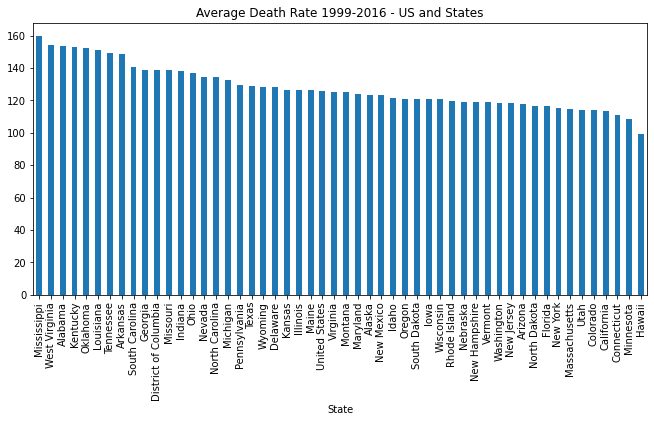

In [63]:
# HIGHEST MEAN AND MEDIAN DEATH RATES APPEAR TO BE CONCENTRATED ON SOUTHERN STATES
# HAWAII HAS THE LOWEST RATES
# Mean death rate - 

plt.figure(figsize=(11, 5))
df.groupby(['State'])['Age-adjusted Death Rate'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('Average Death Rate 1999-2016 - US and States')

Text(0.5, 1.0, 'Median Death Rate 1999-2016 - US and States')

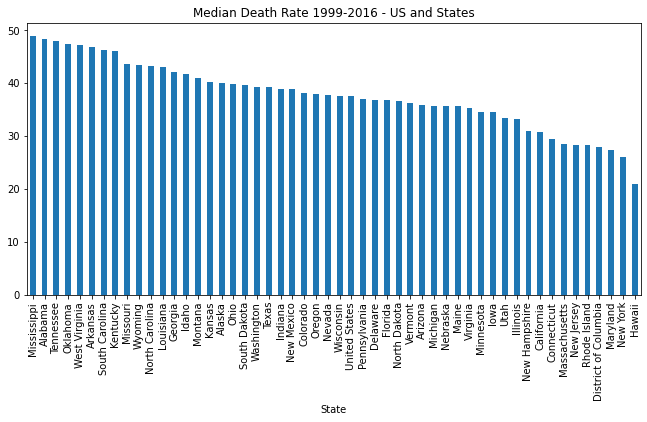

In [65]:
# Median death rate

plt.figure(figsize=(11, 5))
df.groupby(['State'])['Age-adjusted Death Rate'].median().sort_values(ascending=False).plot(kind='bar')
plt.title('Median Death Rate 1999-2016 - US and States')

In [38]:
dfUS = df[df['State'] == 'United States']
dfUS.head(2)

,Year,Cause Name,State,Deaths,Age-adjusted Death Rate,W_Deaths,W_Age Adjusted Death Rate,Region,State_dum
489,2000,Suicide,United States,29350,10.4,12036,10.4,US,1
510,1999,Suicide,United States,29199,10.5,12036,10.5,US,1


Text(0.5, 1.0, 'US - Total Number of Deaths 1999-2016')

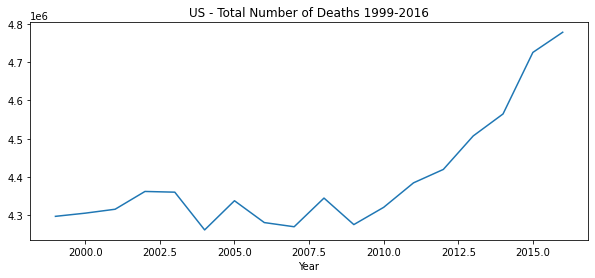

In [39]:
# TOTAL, AVERAGE, MEDIAN NUMBER DEATHS

plt.figure(figsize=(10, 4))
dfUS.groupby(['Year'])['Deaths'].sum().plot()
plt.title('US - Total Number of Deaths 1999-2016')

Text(0.5, 1.0, 'US - Mean Number of Deaths 1999-2016')

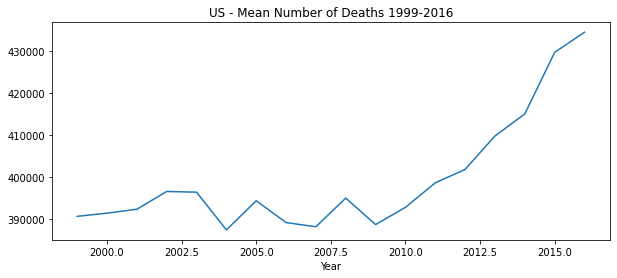

In [40]:

plt.figure(figsize=(10, 4))
dfUS.groupby(['Year'])['Deaths'].mean().plot()
plt.title('US - Mean Number of Deaths 1999-2016')

Text(0.5, 1.0, 'US - Median Number of Deaths 1999-2016')

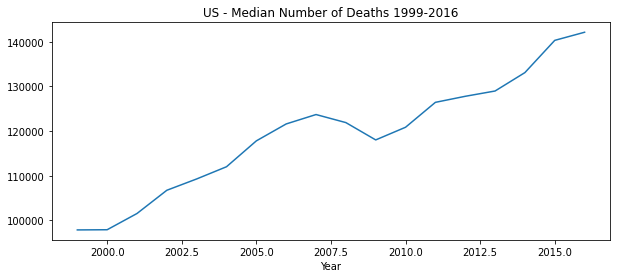

In [41]:
plt.figure(figsize=(10, 4))
dfUS.groupby(['Year'])['Deaths'].median().plot()
plt.title('US - Median Number of Deaths 1999-2016')


## Causes

In [42]:
# HEART DISIEASE AND CANCER ARE THE LEADING CAUSES OF DEATH - BY FAR

# leading cause of death over the period
df.groupby(['Cause Name'])['Deaths'].sum().sort_values(ascending=False)

Cause Name
All causes                 89830132
Heart disease              23150366
Cancer                     20489072
Stroke                      5160280
CLRD                        4869452
Unintentional injuries      4355768
Alzheimer's disease         2746824
Diabetes                    2632758
Influenza and pneumonia     2077938
Kidney disease              1615960
Suicide                     1299686
Name: Deaths, dtype: int64

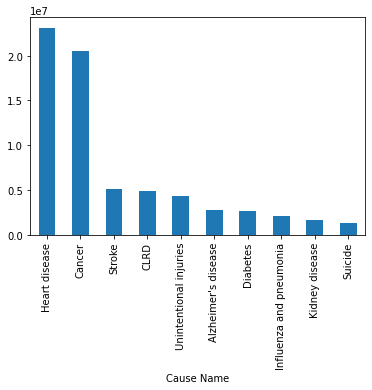

In [43]:
# remove 'All cause' and plot
# heart disease and cancer by far = leading causes of death in US
df2 = df[df['Cause Name'] != 'All causes']
df2.groupby(['Cause Name'])['Deaths'].sum().sort_values(ascending=False).plot(kind='bar')

In [44]:
# WHERE ARE THE LEADING CAUSES OF DEATH CONCENTRATED
# Heart Disease concentrated in the South

dfHeartD = df[df['Cause Name'] == 'Heart disease']
dfHeartD.head(3)

,Year,Cause Name,State,Deaths,Age-adjusted Death Rate,W_Deaths,W_Age Adjusted Death Rate,Region,State_dum
7488,2016,Heart disease,Minnesota,7825,114.9,7825,114.9,MW,0
7489,2014,Heart disease,Minnesota,7659,116.5,7659,116.5,MW,0
7490,2015,Heart disease,Minnesota,7844,116.6,7844,116.6,MW,0


Text(0.5, 1.0, 'Heart Disease Median Death Rate by Region')

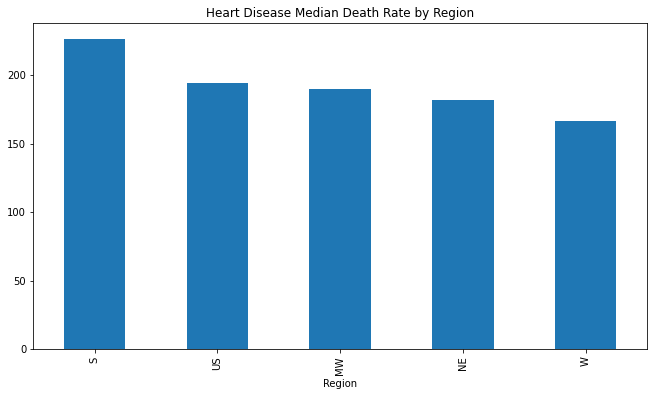

In [47]:
plt.figure(figsize=(11,6))
dfHeartD.groupby(['Region'])['Age-adjusted Death Rate'].median().sort_values(ascending=False).plot(kind='bar')
plt.title('Heart Disease Median Death Rate by Region')

Text(0.5, 1.0, 'Heart Disease Median Death Rate by State')

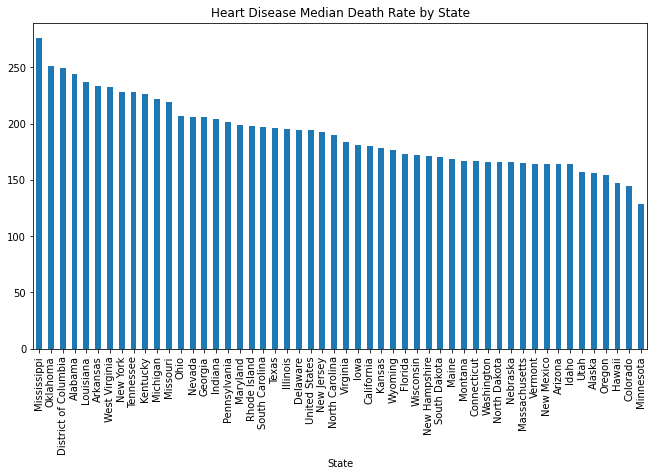

In [48]:
plt.figure(figsize=(11,6))
dfHeartD.groupby(['State'])['Age-adjusted Death Rate'].median().sort_values(ascending=False).plot(kind='bar')
plt.title('Heart Disease Median Death Rate by State')

In [66]:
dfCancer = df[df['Cause Name'] == 'Cancer']
dfCancer.head(3)

,Year,Cause Name,State,Deaths,Age-adjusted Death Rate,W_Deaths,W_Age Adjusted Death Rate,Region,State_dum
7496,2016,Cancer,Utah,3125,122.4,3125,122.4,W,0
7497,2009,Cancer,Utah,2555,124.7,2555,124.7,W,0
7498,2015,Cancer,Utah,3091,125.2,3091,125.2,W,0


Text(0.5, 1.0, 'Cancer Median Death Rate by Region')

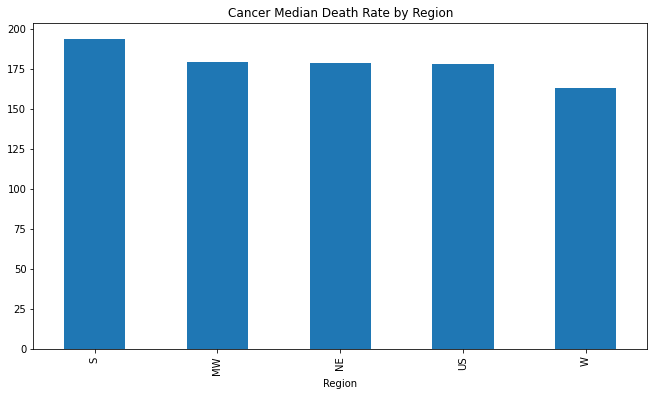

In [67]:
# South also leads in death rate from cancer
plt.figure(figsize=(11,6))
dfCancer.groupby(['Region'])['Age-adjusted Death Rate'].median().sort_values(ascending=False).plot(kind='bar')
plt.title('Cancer Median Death Rate by Region')

Text(0.5, 1.0, 'Cancer Median Death Rate - US and States')

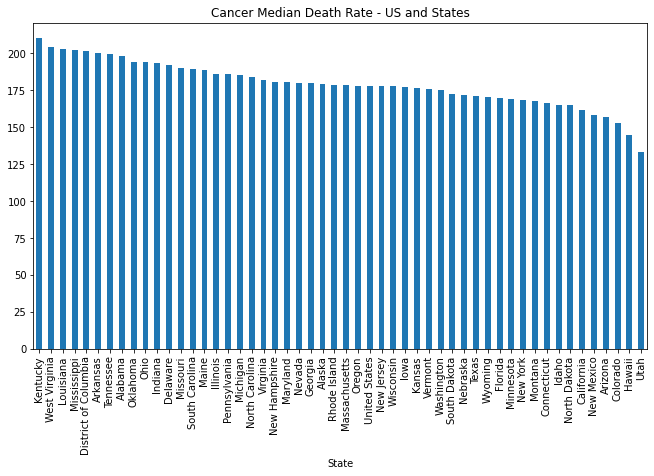

In [69]:
plt.figure(figsize=(11,6))
dfCancer.groupby(['State'])['Age-adjusted Death Rate'].median().sort_values(ascending=False).plot(kind='bar')
plt.title('Cancer Median Death Rate - US and States')

In [70]:

# cause of death by year - totals

#df.groupby(by=['Year','Cause Name'])['Deaths'].sum().sort_values(ascending=False)
df.groupby(by=['Year','Cause Name'])['Deaths'].sum().unstack()

Cause Name,All causes,Alzheimer's disease,CLRD,Cancer,Diabetes,Heart disease,Influenza and pneumonia,Kidney disease,Stroke,Suicide,Unintentional injuries
Year,,,,,,,,,,,
1999,4782798,89072,248362,1099676,136798,1450384,127460,71050,334732,58398,195720
2000,4806702,99116,244018,1106182,138602,1421520,130626,74502,335322,58700,195800
2001,4832850,107704,246026,1107536,142744,1400284,124068,78960,327076,61244,203074
2002,4886774,117732,249632,1114542,146498,1393894,131362,81948,325344,63310,213484
2003,4896576,126914,252764,1113804,148438,1370178,130326,84906,315378,62968,218554
2004,4795230,131930,243974,1107776,146276,1304972,119328,84960,300148,64878,224024
2005,4896034,143198,261866,1118624,150238,1304182,126002,87802,287158,65274,235618
2006,4852528,144864,249166,1119776,144898,1263272,112652,90688,274238,66600,243198
2007,4847424,149264,255848,1125750,142764,1232134,105434,92896,271904,69196,247412


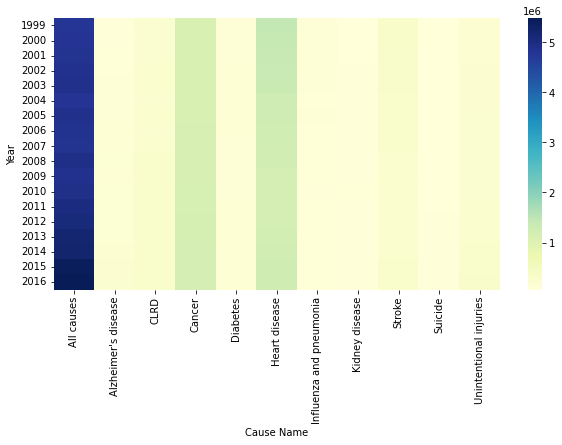

In [71]:
#

# heatmap of sum of causes over time

plt.figure(figsize=(10, 5))
sns.heatmap(df.groupby(by=['Year','Cause Name'])['Deaths'].sum().unstack(), cmap="YlGnBu")


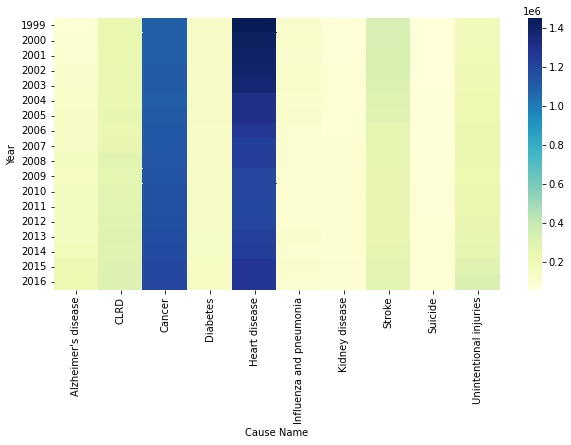

In [72]:
# Remove 'All causes' from data series to get a better look at individual causes

# CAN SEE HEART DISEASE TRENDING DOWN AS SHADING GETS LIGHTER
# STROKE IS ALSO TRENDING DOWN SLOWLY - SHADING GETS LIGHTER
# UNINTENTIONAL INJURIESAPPEAR TO BE GETTING DARKER - TRENDING UP

df2 = df[df['Cause Name'] != 'All causes']
plt.figure(figsize=(10, 5))
sns.heatmap(df2.groupby(by=['Year','Cause Name'])['Deaths'].sum().unstack(), cmap="YlGnBu")

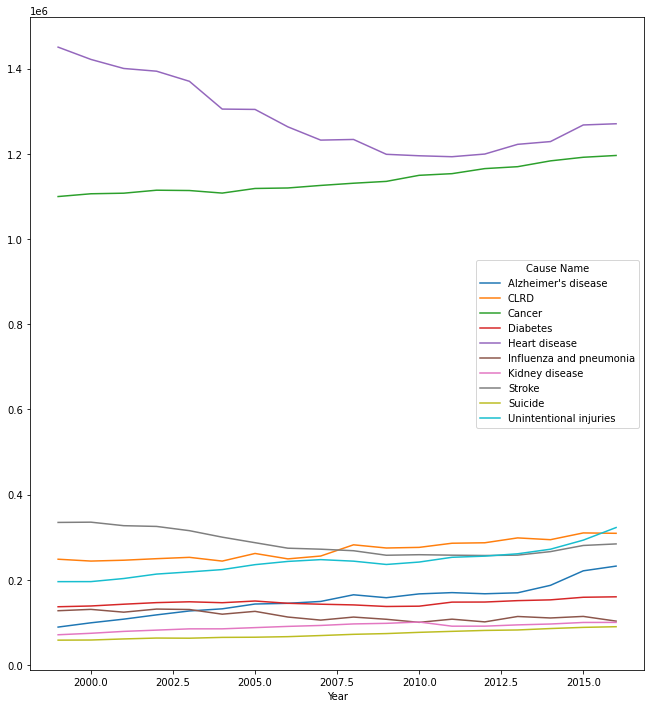

In [56]:
# HEART DISEASE TRENDED DOWN FOR A WHILE BUT IS TRENDING UP SINCE ABOUT 2009
# CANCER HAS STEADILY INCREASED
# OTHER CAUSES - TRENDS REMAIN STEADY

# Remove 'All causes' from data series to get a better look at individual causes
df2 = df[df['Cause Name'] != 'All causes']
df2.groupby(by=['Year', 'Cause Name'])['Deaths'].sum().unstack().plot(figsize=(11, 12))

## regions

In [73]:
df['Region'].value_counts()

S     3366
W     2574
MW    2376
NE    1782
US     198
Name: Region, dtype: int64

In [74]:
df.groupby(['Region'])['Age-adjusted Death Rate'].mean().sort_values(ascending=False)

Region
S     141.029501
US    126.075758
MW    125.522138
W     119.536402
NE    119.347531
Name: Age-adjusted Death Rate, dtype: float64

In [75]:
df.groupby(['Region'])['Age-adjusted Death Rate'].median().sort_values(ascending=False)

Region
S     39.70
US    37.55
MW    36.70
W     35.80
NE    29.85
Name: Age-adjusted Death Rate, dtype: float64

Text(0.5, 1.0, 'Mean Death Rate from Diseases by Regions')

<Figure size 720x432 with 0 Axes>

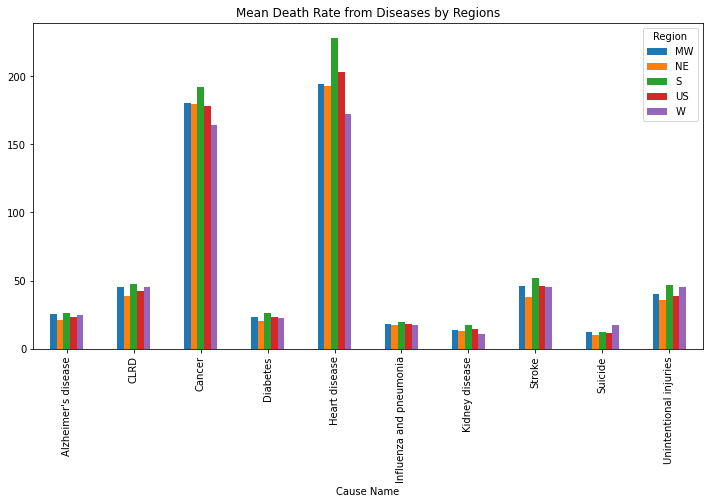

In [79]:
# remove all causes

df2 = df[df['Cause Name'] != 'All causes']
plt.figure(figsize=(10,6))
df2.groupby(['Cause Name', 'Region'])['Age-adjusted Death Rate'].mean().unstack().plot(kind='bar',figsize=(12,6))
plt.title('Mean Death Rate from Diseases by Regions')

In [87]:
# MEDIAN DEATH RATE - SOUTH LEADS IN ALL DISEASESEXCEPT SUICIDE
# MW IS SECOND IN 7 OF THE 10 DISEASES
# NE HAS THE LOWEST RATES IN 7 OF THE 10 DISEASES
# WEST LEADS IN SUICIDE

df2.groupby(['Cause Name', 'Region'])['Age-adjusted Death Rate'].median()

Cause Name               Region
Alzheimer's disease      MW         24.40
                         NE         20.35
                         S          25.50
                         US         23.80
                         W          24.15
CLRD                     MW         45.30
                         NE         38.35
                         S          46.70
                         US         42.35
                         W          46.40
Cancer                   MW        179.45
                         NE        178.35
                         S         193.70
                         US        177.85
                         W         163.10
Diabetes                 MW         23.15
                         NE         20.15
                         S          25.60
                         US         22.40
                         W          22.50
Heart disease            MW        190.00
                         NE        181.80
                         S         226.50
  

Text(0.5, 1.0, 'Median Death Rate from Diseases by Regions')

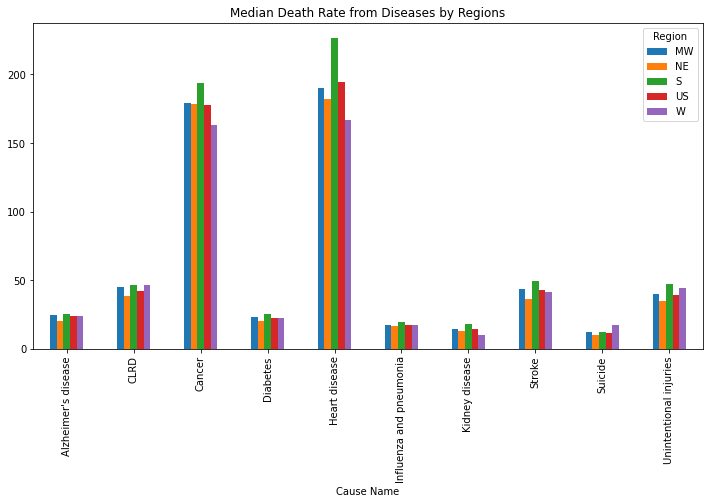

In [80]:


df2.groupby(['Cause Name', 'Region'])['Age-adjusted Death Rate'].median().unstack().plot(kind='bar', figsize=(12,6))
plt.title('Median Death Rate from Diseases by Regions')

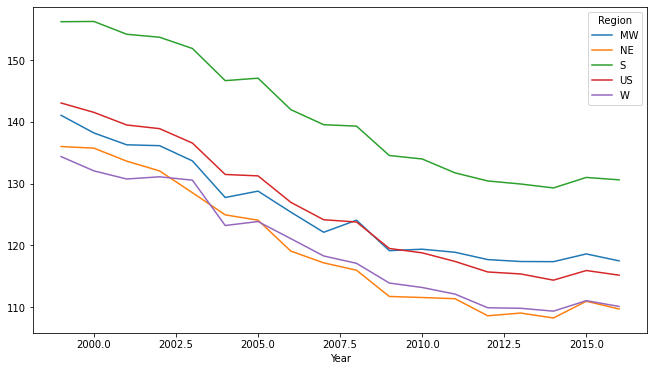

In [90]:


df.groupby(by=['Year', 'Region'])['Age-adjusted Death Rate'].mean().unstack().plot(figsize=(11, 6))


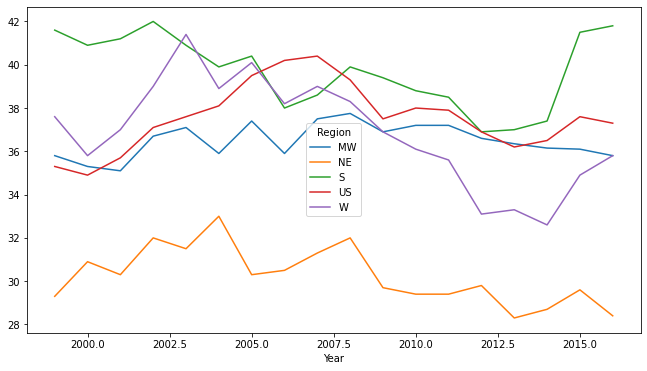

In [91]:


df.groupby(by=['Year', 'Region'])['Age-adjusted Death Rate'].median().unstack().plot(figsize=(11, 6))


# MODEL BUILDING

In [93]:
df.columns

Index(['Year', 'Cause Name', 'State', 'Deaths', 'Age-adjusted Death Rate',
       'W_Deaths', 'W_Age Adjusted Death Rate', 'Region', 'State_dum'],
      dtype='object')

In [94]:
# death and death rates are highly correlated - use one as predictor variable
# since death rate was used to define State_dum, use deaths as predictor

df.corr()

,Year,Deaths,Age-adjusted Death Rate,W_Deaths,W_Age Adjusted Death Rate,State_dum
Year,1.000000,0.003453,-0.039289,0.018160,-0.050363,0.023622
Deaths,0.003453,1.000000,0.231405,0.240049,0.204452,-0.119304
Age-adjusted Death Rate,-0.039289,0.231405,1.000000,0.668614,0.852246,-0.497432
W_Deaths,0.018160,0.240049,0.668614,1.000000,0.763852,-0.547992
W_Age Adjusted Death Rate,-0.050363,0.204452,0.852246,0.763852,1.000000,-0.701454
State_dum,0.023622,-0.119304,-0.497432,-0.547992,-0.701454,1.000000


#### define X and y

In [97]:
# define X and y

X = df[['Year', 'Cause Name', 'W_Deaths']]
X.head(2)

,Year,Cause Name,W_Deaths
0,2012,Kidney disease,21
1,2016,Kidney disease,30


In [99]:
y = df['State_dum']
y

0        1
1        1
2        1
3        1
4        1
        ..
10291    0
10292    0
10293    0
10294    0
10295    0
Name: State_dum, Length: 10296, dtype: int64

In [100]:
# change categorical variable, 'Name Cause', to dummies

X = pd.get_dummies(X, columns = ['Cause Name'])
X.head(3)

,Year,W_Deaths,Cause Name_All causes,Cause Name_Alzheimer's disease,Cause Name_CLRD,Cause Name_Cancer,Cause Name_Diabetes,Cause Name_Heart disease,Cause Name_Influenza and pneumonia,Cause Name_Kidney disease,Cause Name_Stroke,Cause Name_Suicide,Cause Name_Unintentional injuries
0,2012,21,0,0,0,0,0,0,0,1,0,0,0
1,2016,30,0,0,0,0,0,0,0,1,0,0,0
2,2013,30,0,0,0,0,0,0,0,1,0,0,0


#### scale X

In [107]:
# SCALE X

# import scaler function
from sklearn.preprocessing import StandardScaler

In [110]:
scaler = StandardScaler()

In [111]:
# # scaler model to scale X
#scaler.fit(X)

scaler.fit(X)

StandardScaler()

In [112]:
scaled_features = scaler.transform(X)

In [113]:
scaled_features

array([[ 0.86736496, -0.87791662, -0.31622777, ..., -0.31622777,
        -0.31622777, -0.31622777],
       [ 1.63835604, -0.8757973 , -0.31622777, ..., -0.31622777,
        -0.31622777, -0.31622777],
       [ 1.06011273, -0.8757973 , -0.31622777, ..., -0.31622777,
        -0.31622777, -0.31622777],
       ...,
       [-1.44560827,  1.9513786 ,  3.16227766, ..., -0.31622777,
        -0.31622777, -0.31622777],
       [-1.44560827,  0.53025528,  3.16227766, ..., -0.31622777,
        -0.31622777, -0.31622777],
       [-1.63835604,  0.5479163 ,  3.16227766, ..., -0.31622777,
        -0.31622777, -0.31622777]])

In [114]:
X = pd.DataFrame(scaled_features, columns=X.columns)
X.head(2)

,Year,W_Deaths,Cause Name_All causes,Cause Name_Alzheimer's disease,Cause Name_CLRD,Cause Name_Cancer,Cause Name_Diabetes,Cause Name_Heart disease,Cause Name_Influenza and pneumonia,Cause Name_Kidney disease,Cause Name_Stroke,Cause Name_Suicide,Cause Name_Unintentional injuries
0,0.867365,-0.877917,-0.316228,-0.316228,-0.316228,-0.316228,-0.316228,-0.316228,-0.316228,3.162278,-0.316228,-0.316228,-0.316228
1,1.638356,-0.875797,-0.316228,-0.316228,-0.316228,-0.316228,-0.316228,-0.316228,-0.316228,3.162278,-0.316228,-0.316228,-0.316228


#### train test split

In [116]:
from sklearn.model_selection import train_test_split


In [117]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,y, test_size=0.30)


## Logistic Regression

In [130]:
from sklearn.linear_model import LogisticRegression

In [131]:
# define the model
logmodel = LogisticRegression()

In [132]:
# fit on the training set
logmodel.fit(X_train,y_train)

LogisticRegression()

In [133]:
# predict on test set
predictions = logmodel.predict(X_test)

In [134]:
# evaluate predictions
from sklearn.metrics import classification_report

In [135]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93      1491
           1       0.99      0.86      0.92      1598

    accuracy                           0.92      3089
   macro avg       0.93      0.93      0.92      3089
weighted avg       0.93      0.92      0.92      3089



## KNN MODEL

In [118]:
from sklearn.neighbors import KNeighborsClassifier

In [119]:
knn = KNeighborsClassifier(n_neighbors=1)

In [120]:
# FIT THE MODEL

knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [121]:
# PREDICTION

pred = knn.predict(X_test)

In [122]:
from sklearn.metrics import classification_report,confusion_matrix

In [123]:
print(confusion_matrix(y_test,pred))

[[1331  160]
 [ 172 1426]]


In [124]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      1491
           1       0.90      0.89      0.90      1598

    accuracy                           0.89      3089
   macro avg       0.89      0.89      0.89      3089
weighted avg       0.89      0.89      0.89      3089



### Choosing a K value

In [125]:
error_rate = []

for i in range(1,50):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

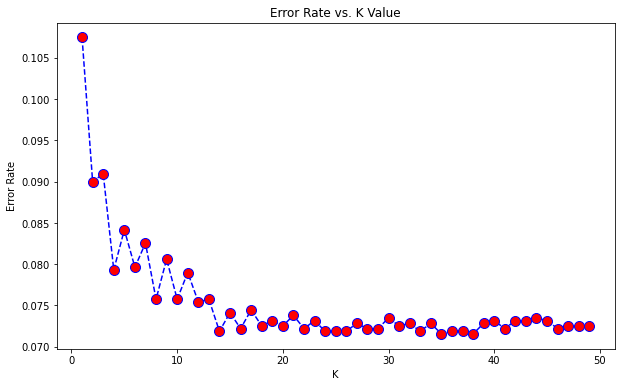

In [126]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [129]:
# NOW WITH K=8
knn = KNeighborsClassifier(n_neighbors=8)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=8')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=8


[[1431   60]
 [ 174 1424]]


              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1491
           1       0.96      0.89      0.92      1598

    accuracy                           0.92      3089
   macro avg       0.93      0.93      0.92      3089
weighted avg       0.93      0.92      0.92      3089



In [136]:
print(logmodel.score(X_test,y_test))
pp = logmodel.predict(X_test)
print("0", sum(pp!=0))
print("1", sum(pp==0))

0.9239235998705082
0 1395
1 1694


## Decision Tree

In [137]:
from sklearn.tree import DecisionTreeClassifier

In [138]:
dtree = DecisionTreeClassifier()

In [139]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [140]:
y_predict = dtree.predict(X_test)

In [141]:
from sklearn.metrics import confusion_matrix, classification_report

In [142]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92      1491
           1       0.92      0.92      0.92      1598

    accuracy                           0.92      3089
   macro avg       0.92      0.92      0.92      3089
weighted avg       0.92      0.92      0.92      3089



In [143]:
print(confusion_matrix(y_test, y_predict))

[[1369  122]
 [ 132 1466]]


## Random Forest

In [144]:
from sklearn.ensemble import RandomForestClassifier

In [145]:
rforest = RandomForestClassifier(n_estimators = 300)

In [146]:
rforest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300)

In [147]:
y_predict = rforest.predict(X_test)

In [148]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1491
           1       0.92      0.90      0.91      1598

    accuracy                           0.91      3089
   macro avg       0.91      0.91      0.91      3089
weighted avg       0.91      0.91      0.91      3089



In [149]:
print(confusion_matrix(y_test,y_predict))

[[1371  120]
 [ 160 1438]]


## SVM

In [150]:
from sklearn.svm import SVC

In [151]:
model = SVC()

In [152]:
model.fit(X_train,y_train)

SVC()

In [153]:
predictions = model.predict(X_test)

In [154]:
from sklearn.metrics import classification_report,confusion_matrix

In [155]:
print(confusion_matrix(y_test,predictions))

[[1452   39]
 [ 194 1404]]


In [156]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.88      0.97      0.93      1491
           1       0.97      0.88      0.92      1598

    accuracy                           0.92      3089
   macro avg       0.93      0.93      0.92      3089
weighted avg       0.93      0.92      0.92      3089



the models have accuracy rate of 91-92 percent - anyone would be acceptable